In [1]:
import sys
sys.path.insert(1, '../exercises')
from mne_bids import (BIDSPath,read_raw_bids)
import mne_bids
import importlib
import mne, os
import ccs_eeg_utils

#ccs_eeg_utils.download_erpcore(task="P3",subject=30,localpath="../local/bids/")

bids_root = os.path.join('data', 'P3')
subject_id = '030'

bids_path = BIDSPath(subject=subject_id, session='P3', task='P3',
                        datatype='eeg', suffix='eeg', root=bids_root)

raw = read_raw_bids(bids_path)
ccs_eeg_utils.read_annotations_core(bids_path,raw)
raw.load_data()
raw.filter(0.5,50, fir_design='firwin')

Reading /Users/ssaurabh/Projects/eeg-pipeline/data/P3/sub-030/ses-P3/eeg/sub-030_ses-P3_task-P3_eeg.fdt


<ipython-input-1-10307da0c94c>:17: RuntimeWarning: Data file name in EEG.data (sub-030_task-P3_eeg.fdt) is incorrect, the file name must have changed on disk, using the correct file name (sub-030_ses-P3_task-P3_eeg.fdt).
  raw = read_raw_bids(bids_path)


Reading events from data/P3/sub-030/ses-P3/eeg/sub-030_ses-P3_task-P3_events.tsv.
The event "response" refers to multiple event values. Creating hierarchical event names.
    Renaming event: response -> response/202
    Renaming event: response -> response/202
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event:

<ipython-input-1-10307da0c94c>:17: RuntimeWarning: Participants file not found for sub-030_ses-P3_task-P3_eeg.set... Not reading in any particpants.tsv data.
  raw = read_raw_bids(bids_path)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 6759 samples (6.601 sec)



<RawEEGLAB | sub-030_ses-P3_task-P3_eeg.fdt, 33 x 393216 (384.0 s), ~99.0 MB, data loaded>

**T:** Go through the dataset using the MNE explorer and clean it. You can use `raw.plot()` for this. If you are working from a jupyter notebook, try to use `%matplotlib qt` for better support of the cleaning window. To get an understanding how the tool works, press `help` or type `?` in the window. (Hint: You first have to add a new annotation by pressing `a`)

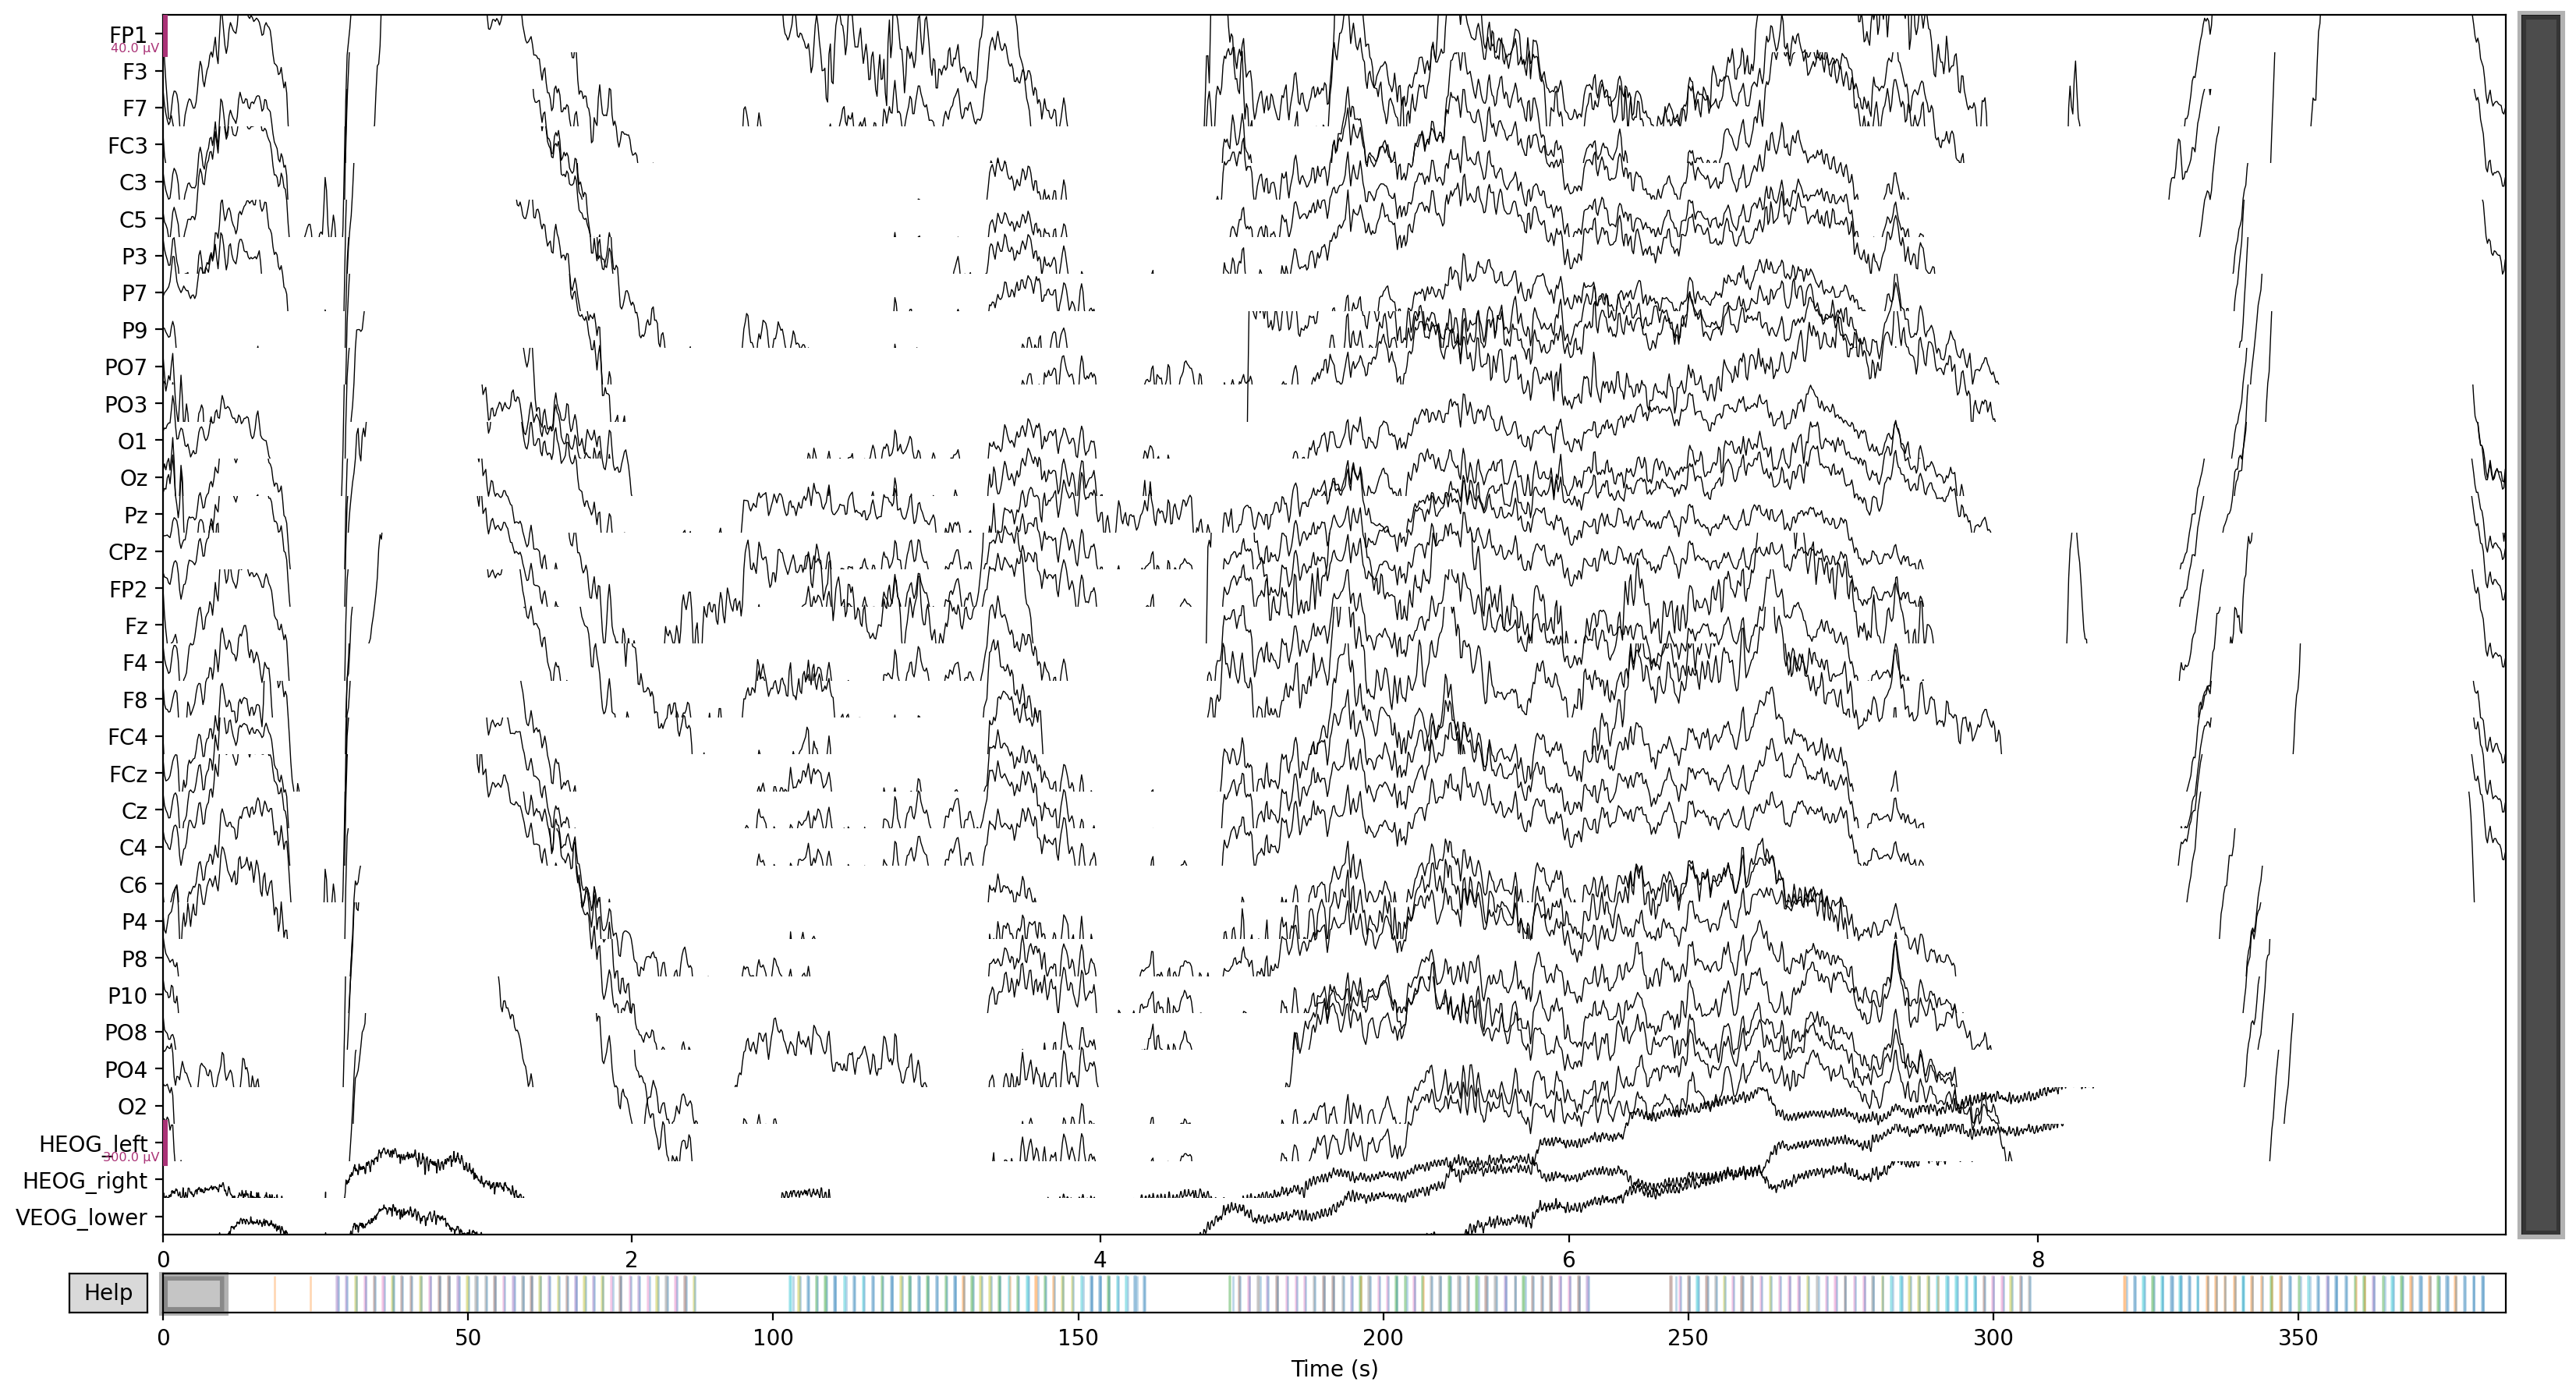

In [2]:
%matplotlib qt
raw.plot(n_channels=len(raw.ch_names))#,scalings =40e-6)
# See below

In [3]:
bad_ix = [i for i,a in enumerate(raw.annotations) if a['description']=="BAD_"]

#raw.annotations[bad_ix].save("sub-{}_task-P3_badannotations.csv".format(subject_id))


annotations = mne.read_annotations("sub-{}_task-P3_badannotations.csv".format(subject_id))
raw.annotations.append(annotations.onset,annotations.duration,annotations.description)


FileNotFoundError: fname does not exist: sub-030_task-P3_badannotations.csv

Channels marked as bad: none


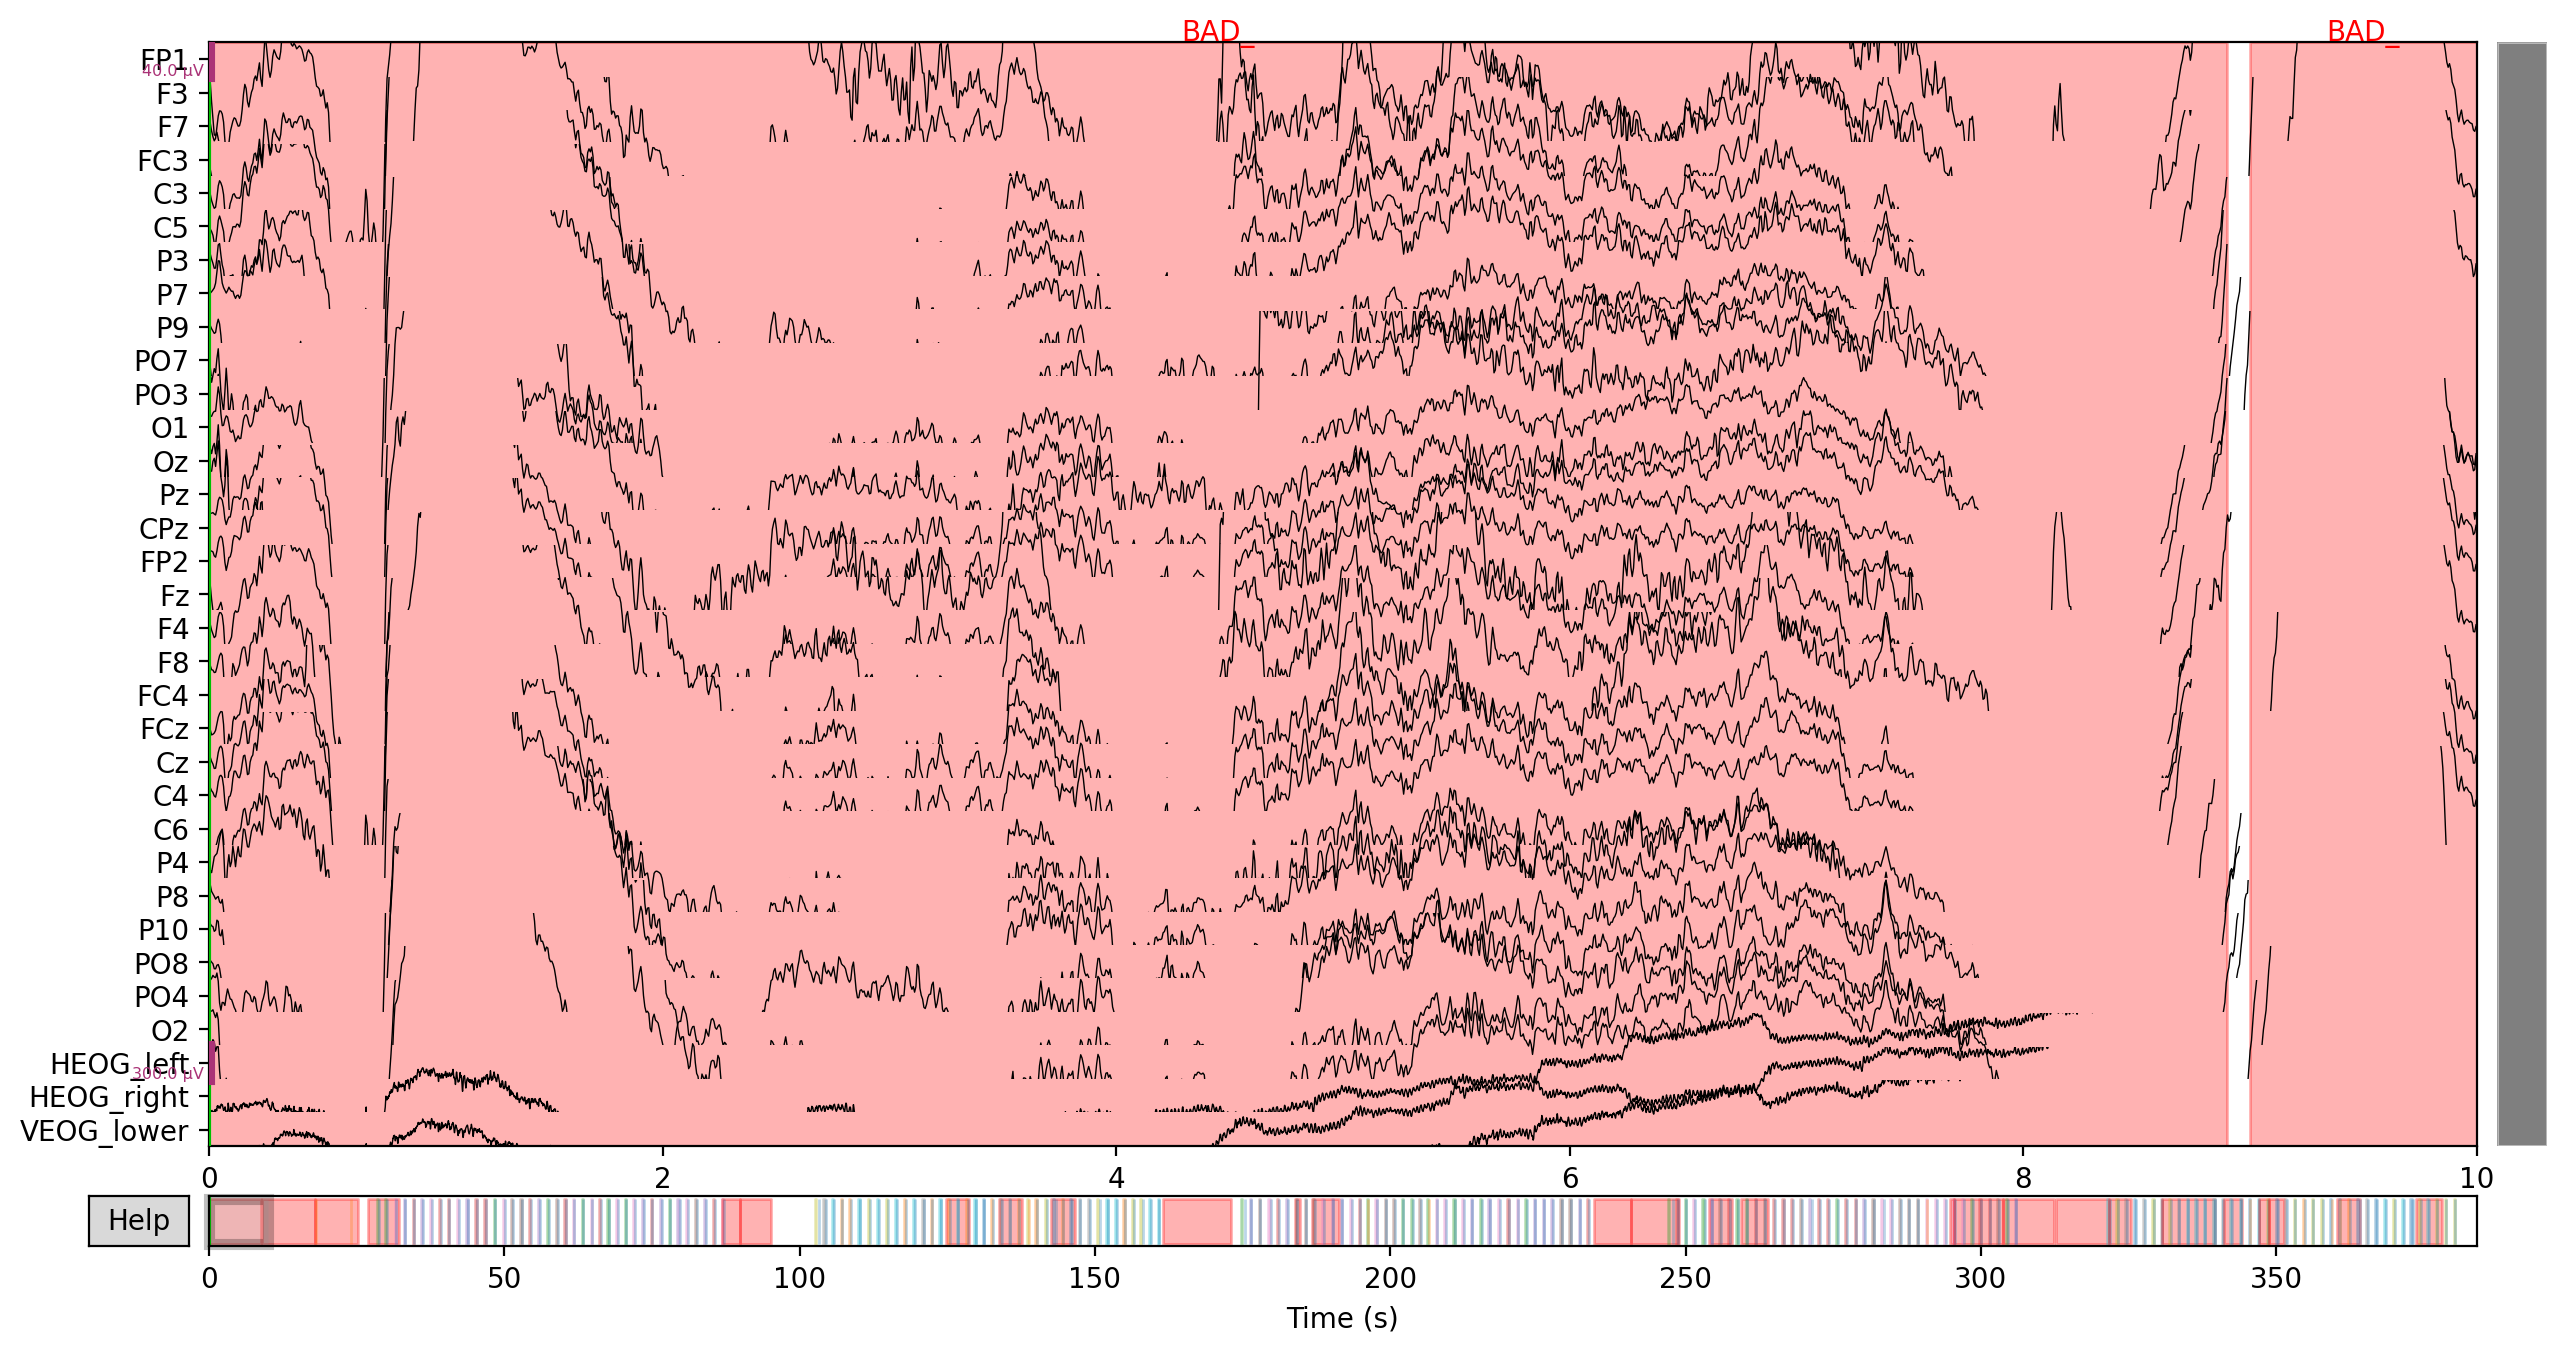

In [ ]:
%matplotlib qt
raw.plot(n_channels=len(raw.ch_names))


**T:** While going through the dataset, mark what you observe as bad electrodes. Those are saved in `raw.info['bads']`. The channels can be interpolated with `raw.interpolate_bads()` or `epoch.interpolate_bads()`. Compare the channel + neighbours before and after. Did the interpolation succeed? (If you are interested in the mathematical details of spline interpolation, checkout this https://mne.tools/dev/overview/implementation.html#id26)
Hint: You need channel locations to run the interpolation which you can get by using the default-standardized channel locations `raw.set_montage('standard_1020',match_case=False)`

In [ ]:
# I thought there was not really a bad channel in this dataset, so I remove one at random.
raw.info['bads'] = ['FP2']
# for interpolation
raw.set_montage('standard_1020',match_case=False)
raw.interpolate_bads()

Interpolating bad channels
    Automatic origin fit: head of radius 93.5 mm
Computing interpolation matrix from 29 sensor positions
Interpolating 1 sensors


<RawEEGLAB | sub-030_ses-P3_task-P3_eeg.fdt, 33 x 393216 (384.0 s), ~99.0 MB, data loaded>

In [ ]:
!"{sys.executable}" -m pip install mne --upgrade

distutils: /opt/anaconda3/envs/mne/include/python3.9/UNKNOWN
sysconfig: /opt/anaconda3/envs/mne/include/python3.9
user = False
home = None
root = None
prefix = None
  Using cached mne-0.23.0-py3-none-any.whl (6.9 MB)
  Attempting uninstall: mne
    Found existing installation: mne 0.22.1
    Uninstalling mne-0.22.1:
      Successfully uninstalled mne-0.22.1
distutils: /opt/anaconda3/envs/mne/include/python3.9/UNKNOWN
sysconfig: /opt/anaconda3/envs/mne/include/python3.9
user = False
home = None
root = None
prefix = None


**T:** In the epoching step, we can also specify rejection criterion for a peak-to-peak rejection method

Used Annotations descriptions: ['response:201', 'response:202', 'stimulus:11', 'stimulus:12', 'stimulus:13', 'stimulus:14', 'stimulus:15', 'stimulus:21', 'stimulus:22', 'stimulus:23', 'stimulus:24', 'stimulus:25', 'stimulus:31', 'stimulus:32', 'stimulus:33', 'stimulus:34', 'stimulus:35', 'stimulus:41', 'stimulus:42', 'stimulus:43', 'stimulus:44', 'stimulus:45', 'stimulus:51', 'stimulus:52', 'stimulus:53', 'stimulus:54', 'stimulus:55']
Not setting metadata
Not setting metadata
200 matching events found
Setting baseline interval to [-0.099609375, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
Not setting metadata
200 matching events found
Setting baseline interval to [-0.099609375, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated


<ipython-input-6-c077297015b6>:17: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  mne.viz.plot_compare_evokeds({'raw':epochs.average(),'clean':epochs_manual.average()},picks="Cz")


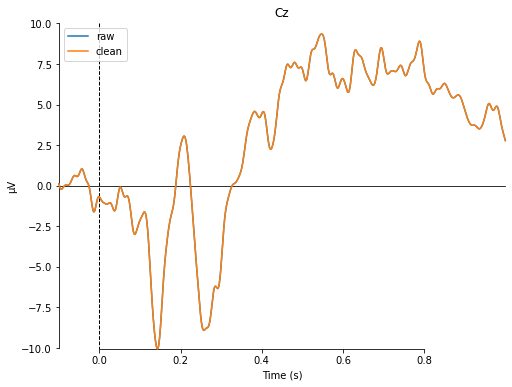

[<Figure size 576x432 with 1 Axes>]

In [6]:
%matplotlib inline
import mne
evts,evts_dict = mne.events_from_annotations(raw)
wanted_keys = [e for e in evts_dict.keys() if "stimulus" in e]
evts_dict_stim=dict((k, evts_dict[k]) for k in wanted_keys if k in evts_dict)

# get epochs with and without rejection
epochs        = mne.Epochs(raw,evts,evts_dict_stim,tmin=-0.1,tmax=1,reject_by_annotation=False)
epochs_manual = mne.Epochs(raw,evts,evts_dict_stim,tmin=-0.1,tmax=1,reject_by_annotation=True)
# reject_criteria = dict(eeg=200e-6,       # 100 µV # HAD TO INCREASE IT HERE, 100 was too harsh
#                        eog=200e-6)       # 200 µV
# epochs_thresh = mne.Epochs(raw,evts,evts_dict_stim,tmin=-0.1,tmax=1,reject=reject_criteria,reject_by_annotation=False)

#from matplotlib import pyplot as plt
# compare
#plt.plot([0,:])
mne.viz.plot_compare_evokeds({'raw':epochs.average(),'clean':epochs_manual.average()},picks="Cz")


## Bonus Tasks!

In [ ]:
from autoreject import AutoReject
ar = AutoReject(verbose='tqdm')
epochs.load_data()
epochs_ar = ar.fit_transform(epochs)  

ModuleNotFoundError: No module named 'autoreject'

In [ ]:
r = ar.get_reject_log(epochs)

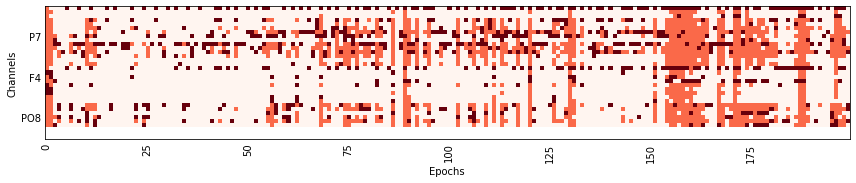

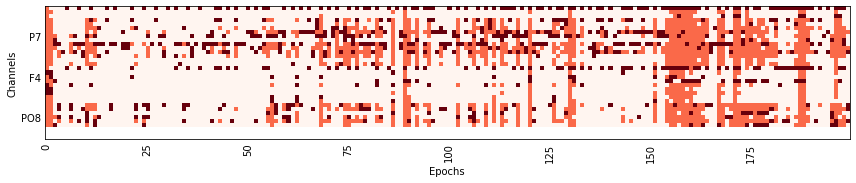

In [ ]:
r.plot(orientation="horizontal")

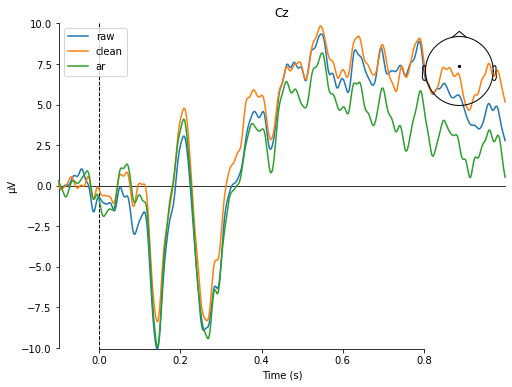

[<Figure size 576x432 with 2 Axes>]

In [ ]:

mne.viz.plot_compare_evokeds({
    'raw':epochs.average(),
    'clean':epochs_manual.average(),
    'ar':epochs_ar.average()
    },picks="Cz")


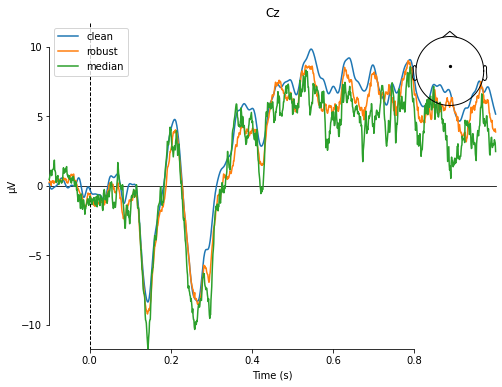

[<Figure size 576x432 with 2 Axes>]

In [ ]:
from scipy.stats.mstats import winsorize
import numpy as np
def winsor(d):
    return np.mean(winsorize(d,axis=0,limits=(0.2,0.2)),axis=0)
def median(d):
    return np.median(d,axis=0)

mne.viz.plot_compare_evokeds({
    'clean':epochs_manual.average(),
    'robust':epochs.average(method=winsor),
    'median':epochs.average(method=median),
    },picks="Cz")

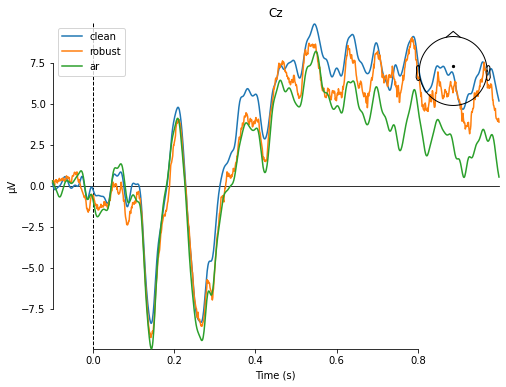

[<Figure size 576x432 with 2 Axes>]

In [ ]:
mne.viz.plot_compare_evokeds({
    'clean':epochs_manual.average(),
    'robust':epochs.average(method=winsor),
    'ar':epochs_ar.average()
    },picks="Cz")

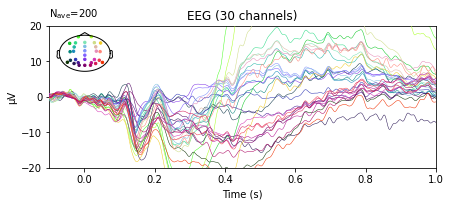

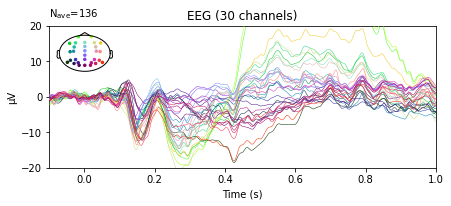

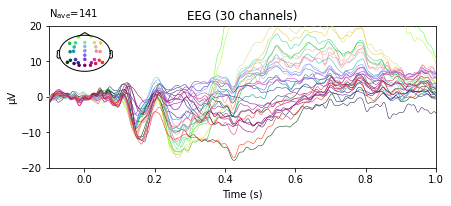

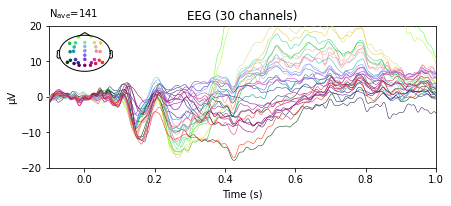

In [ ]:
%matplotlib inline
ylim = dict(eeg=(-20, 20))
epochs.average().plot(ylim=ylim, spatial_colors=True)
epochs_ar.average().plot(ylim=ylim, spatial_colors=True)
epochs_manual.average().plot(ylim=ylim, spatial_colors=True)